In [135]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats
import scipy.io as io
import time

plt.rc("font", family=["Times New Roman"]) #skifter skrifttype
plt.rc("axes", labelsize=18)   #skriftstørrelse af `xlabel` og `ylabel`
plt.rc("xtick", labelsize=16, direction="out")  #skriftstørrelse af ticks og viser ticks øverst
plt.rc("ytick", labelsize=16, direction="out")
plt.rc("axes", titlesize=22)
plt.rc("legend", fontsize=16)


In [50]:
path_array = [r"C:/Users/nicol/Experimentel Physics/Experimentel-Physics-2/Michelson-interferometer", 
              r"/Users/karsten/eksperimental/Experimentel-Physics-2/Michelson-interferometer"]

data = io.loadmat(path_array[0] + r"/DataDay1.mat")
dA = data.get("A")
dB_old = data.get("B")
dB = np.transpose(dB_old)[0]

#print(type(data))
#for key in data :
 #   print(key)


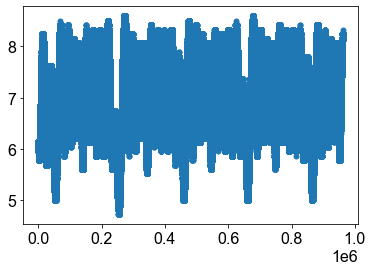

In [168]:
plt.plot(range(len(dA)), dA, 'o', markersize=5)

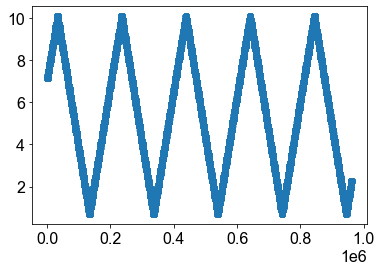

In [169]:
plt.plot(range(len(dB)), dB, 'o', markersize=5)

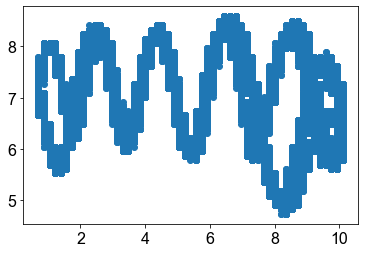

In [9]:
plt.plot(dB, dA, 'o')

In [159]:
dB_list = []
i_list = []

for i in range(len(dB)) : 
    if(i+1 == len(dB)) : 
        break
    if(i == 0) : 
        dB_list.append(dB[i])
    
    if dB[i+1] != dB[i] : 
        boolsk = True
        array = [3, 2, 1]
        for tr in array: 
            if len(dB_list) >= tr : 
                if dB_list[-(tr)] == dB[i] :
                    boolsk = False
        if boolsk == True : 
            i_list.append(i)
            dB_list.append(dB[i])

In [165]:
#print(len(dB_list))
#print(len(dB))
#print(len(i_list))
#print(i_list)
#print(dB_list[0:100])

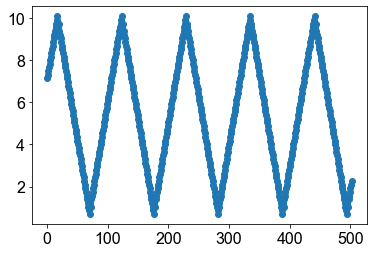

In [164]:
plt.plot(range(len(dB_list)), dB_list, 'o')

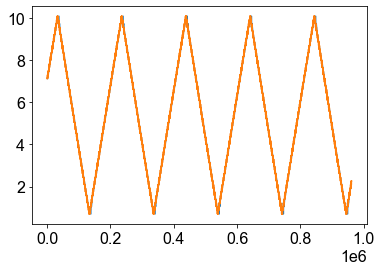

In [166]:
grad = np.gradient(dB_list)
plt.plot(i_list, dB_list[:-1])
plt.plot(range(len(dB)), dB)

503


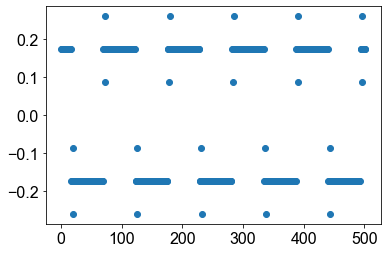

In [167]:
plt.plot(range(len(grad)), grad, 'o')
print(len(grad))

In [5]:
path_array = [r"C:/Users/nicol/Experimentel Physics/Experimentel-Physics-2/Michelson-interferometer", 
              r"/Users/karsten/eksperimental/Experimentel-Physics-2/Michelson-interferometer"]

def get_ts_Vs(entries):
    ts = []
    Vas = []
    Vbs = []
    #for entry in entries:
    data = io.loadmat(path_array[0] + entries)
    Vb = np.transpose(data.get("B"))[0]
    #print(Vb)
    Va = np.transpose(data.get("A"))[0]
    t = np.linspace(0,100, len(Vb))
    Vas.append(Va)
    Vbs.append(Vb)
    ts.append(t)
    return ts, Vas, Vbs


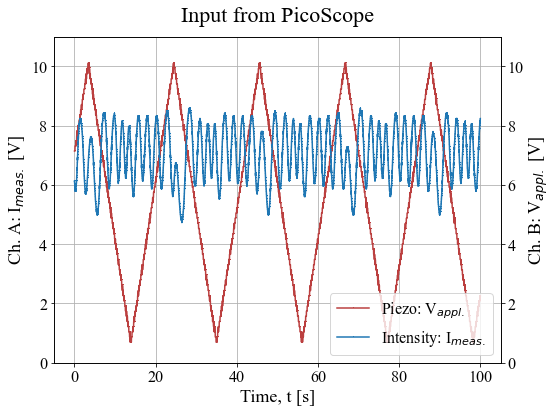

In [185]:
ts, Vas, Vbs = get_ts_Vs(r"/DataDay1.mat")

fig, ax1 = plt.subplots(figsize=(8,6))

ax1.set_title("Input from PicoScope", pad = 15)

skip_every = 24

ax2 = ax1.twinx()

ax2.plot(ts[0][0:len(ts[0]):skip_every], Vas[0][0:len(ts[0]):skip_every], marker=',', color='tab:blue', label='Intensity: I$_{meas.}$')



ax1.plot(ts[0][0:len(ts[0]):skip_every], Vbs[0][0:len(ts[0]):skip_every], marker=',', color='#bb3f3f', label='Piezo: V$_{appl.}$')

ax2.set_ylim(0, 11)
ax1.set_ylim(0, 11)

ax1.grid()

ax1.set_xlabel("Time, t [s]")
ax2.set_ylabel("Ch. B: V$_{appl.}$ [V]")
ax1.set_ylabel("Ch. A: I$_{meas.}$ [V]")


lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right')

plt.savefig("Raw data.png", format="png")


NameError: name 'plot_colortable' is not defined

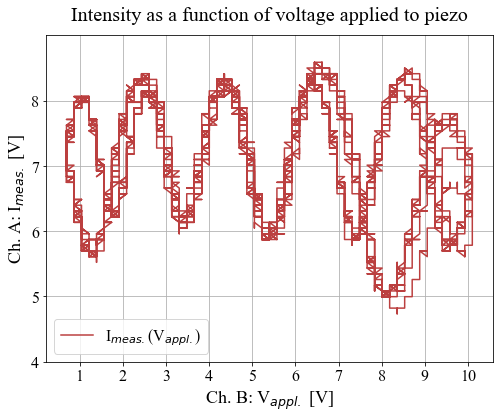

In [198]:
fig, ax = plt.subplots(figsize=(8,6))

skip_every = 32

Vas2 = Vas[0]
Vbs2 = Vbs[0]

ax.plot(Vbs2[0:len(Vbs[0]):skip_every], Vas2[0:len(Vbs[0]):skip_every], '-', color='#bb3f3f', label='I$_{meas.}$(V$_{appl.}$)')
ax.grid()
ax.set_ylim(4, 9)
ax.legend(loc='lower left')
ax.set_xlabel("Ch. B: V$_{appl.}$ [V]")
ax.set_ylabel("Ch. A: I$_{meas.}$ [V]")

ax.set_yticks(np.arange(4,9,1))
ax.set_xticks(np.arange(1, 11, 1))

ax.set_title("Intensity as a function of voltage applied to piezo", pad=15, size=20)

plt.savefig("I(V).png", format="png")



In [86]:
print(len(Vbs[0][0:len(Vbs[0]):skip_every]))
print(len(Vbs[0]))


480770
961539
480769.5


In [235]:
forward_tracks_list = []
forward_ts_list = []

backward_tracks_list = []
backward_ts_list = []
one_fscan = []

st = time.time()

i_final = 0
abe = 0
nextrun = True
i_prev = 0

while(abe < 5):
    dy_init = 0
    
    forward_tracks = []
    
    backward_tracks = []
    
    forward_ts = []
    backward_ts = []
    
    i = 0
    for t, Vd in zip(ts[0][i_prev::], Vbs[0][i_prev::]):
        if i == 0:
            curr_Vb = Vd
        else:
            if len(forward_tracks) == 0 and len(backward_tracks) == 0:
                dy_init = (Vd - curr_Vb)/0.000104
                if dy_init > 0:
                    forward_tracks.append(Vd)
                    forward_ts.append(t)
                    
                if dy_init < 0:
                    backward_tracks.append(Vd)
                    backward_ts.append(t)
            
            if dy_init > 0:
                if (Vd - forward_tracks[-1])/0.000104 > 0:
                    forward_tracks.append(Vd)
                    forward_ts.append(t)
                    i_final = i
                
            if dy_init < 0:
                if (Vd - backward_tracks[-1])/0.000104 < 0:
                    backward_tracks.append(Vd)
                    backward_ts.append(t)
                    i_final = i
        i = i + 1
    i_prev = i_prev + i_final
    if dy_init > 0:
        forward_tracks_list.append(forward_tracks)
        forward_ts_list.append(forward_ts)
    if dy_init < 0:
        backward_tracks_list.append(backward_tracks)
        backward_ts_list.append(backward_ts)
    #print(i_final)
    #print(dy_init)
    
    abe = abe + 1

end = time.time()
print('Elapsed time:', end - st, "seconds")

Elapsed time: 15.737011909484863 seconds


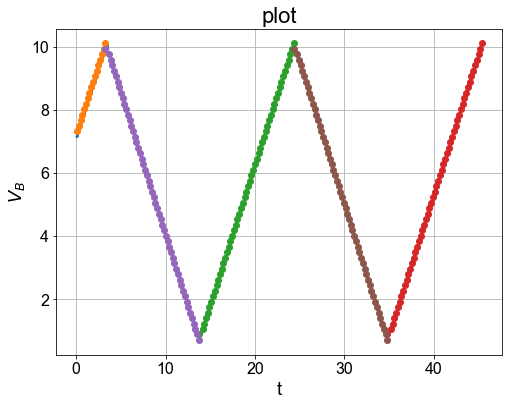

In [236]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title("plot")
ax.set_xlabel("t")
ax.set_ylabel(r"$V_B$")
ax.plot(ts[0][0:34804], Vbs[0][0:34804])
#ax.plot(tsMin, minVbs, 'o')
#ax.plot(tsMax, maxVbs, 'o')#[0:8000]
for tsw, forw in zip(forward_ts_list, forward_tracks_list):
    ax.plot(tsw, forw, 'o')

for tsb, backw in zip(backward_ts_list, backward_tracks_list):
    ax.plot(tsb, backw, 'o')

ax.grid()

In [285]:
index_list = []
Va_forward_list = []
Va_backward_list = []

for track in forward_ts_list :
    Va = []
    for t_in_list in track : 
        i = np.where(ts[0] == t_in_list)
        #index_list.append(i[0][0])
        Va.append(Vas[0][i[0][0]])
    
    Va_forward_list.append(Va)

for track in backward_ts_list : 
    Va = []
    for t_in_list in track : 
        i = np.where(ts[0] == t_in_list)
        Va.append(Vas[0][i[0][0]])
    
    Va_backward_list.append(Va)
        



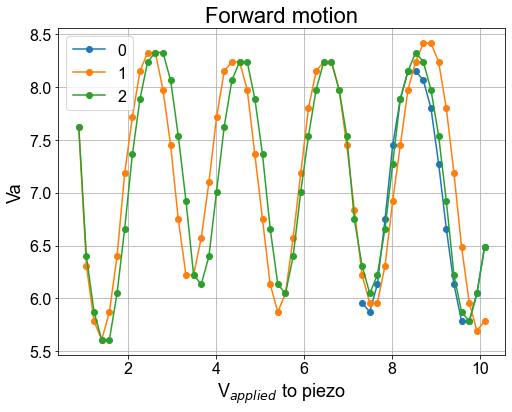

In [307]:
fig, ax = plt.subplots(figsize=(8,6))

col_ar = 

ax.set_title("Forward motion")
ax.set_xlabel("V$_{applied}$ to piezo")
ax.set_ylabel("Va")
ax.grid()
for index, Vb, Va in zip(range(len(forward_tracks_list)), forward_tracks_list, Va_forward_list) : 
    Va_slope = np.gradient(Va)    
    ax.plot(Vb, Va, '-o', label="{}".format(index))
ax.legend()


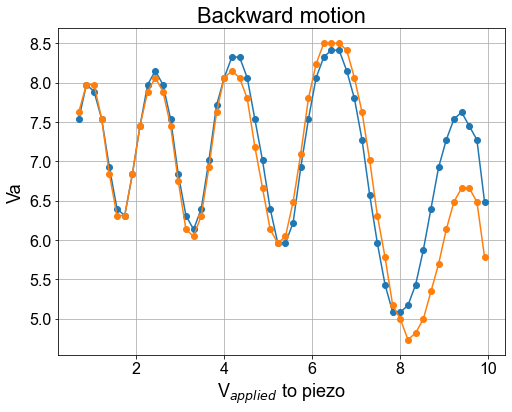

In [340]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title("Backward motion")
ax.set_xlabel("V$_{applied}$ to piezo")
ax.set_ylabel("Va")
ax.grid()
for Vb, Va in zip(backward_tracks_list, Va_backward_list) : 
    ax.plot(Vb, Va, '-o')

[-1.2269316  -0.87644553 -0.39431596 -0.13133621  0.21899605  0.52580595
  0.6572957   0.6134658   0.43829966  0.21914959  0.04382992 -0.13148975
 -0.3944695  -0.56963587 -0.65729594 -0.39446974  0.08766007  0.43829966
  0.6134658   0.52580595  0.30680966  0.08765984 -0.17531967 -0.43829966
 -0.6134658  -0.6134658  -0.3068099   0.13148999  0.48212957  0.56963587
  0.48197603  0.35063958  0.13148975 -0.13148975 -0.35063958 -0.6134658
 -0.6134658  -0.35063982 -0.04383016  0.3068099   0.52580595  0.6134658
  0.43829966  0.21914959  0.04382992 -0.17531967 -0.35063958 -0.52580595
 -0.65729594 -0.5259595  -0.21914983  0.08765984  0.35063982  0.43829966]
[ 3 10 11 16 21 27 32 33 38 44 51]
-0.39431596 -0.13133621


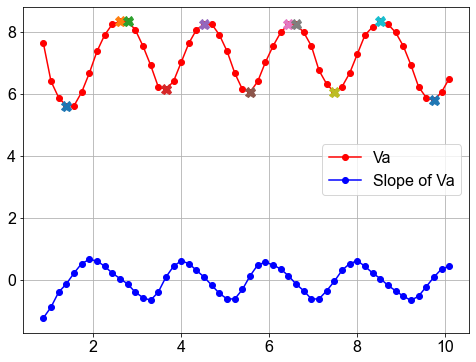

In [341]:
Va_slope = np.gradient(Va_forward_list[2])
print(Va_slope)
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(forward_tracks_list[2], Va_forward_list[2], '-o', color='r', label='Va')
ax.plot(forward_tracks_list[2], Va_slope, '-o', color='b', label='Slope of Va')
ax.legend()
ax.grid()

delta = 0.135
x = np.where((Va_slope < delta) & (Va_slope > -delta))
print(x[0])

for i in x[0] : 
    ax.plot(forward_tracks_list[2][i], Va_forward_list[2][i], "X", markersize = 10)
    
print(Va_slope[2], Va_slope[3])

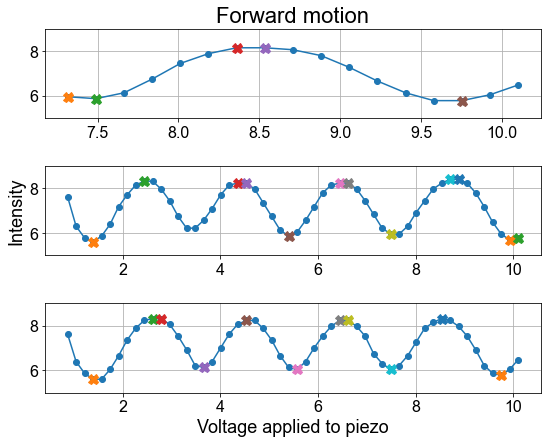

In [361]:
fig, ax = plt.subplots(len(Va_forward_list), 1, figsize=(8,6), sharey = True)
fig.tight_layout(pad=2.0)
ax[0].set_title("Forward motion")
ax[0].set_ylim(5, 9)
ax[-1].set_xlabel("Voltage applied to piezo")
ax[1].set_ylabel("Intensity")

for plt_nr, Vb, Va in zip(range(len(Va_forward_list)), forward_tracks_list, Va_forward_list) : 
    ax[plt_nr].plot(Vb, Va, '-o', label='Track: {}'.format(plt_nr+1))
    #ax[plt_nr].legend()
    ax[plt_nr].grid()
    
    Va_slope = np.gradient(Va)
    
    delta = 0.135
    extremas = np.where((Va_slope < delta) & (Va_slope > -delta))
    for point in extremas[0] :
        ax[plt_nr].plot(Vb[point], Va[point], 'X', markersize=10)
        
    

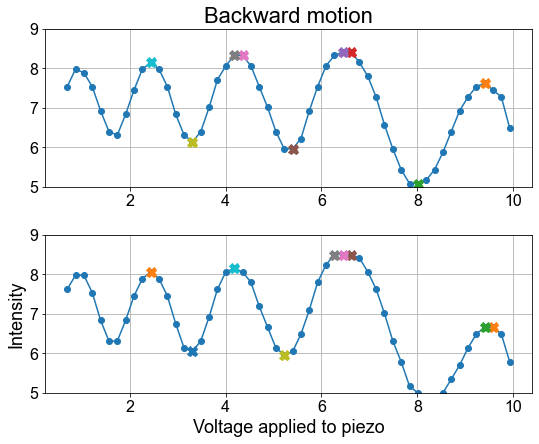

In [362]:
fig, ax = plt.subplots(len(Va_backward_list), 1, figsize=(8,6), sharey = True)
fig.tight_layout(pad=2.0)
ax[0].set_title("Backward motion")
ax[0].set_ylim(5, 9)
ax[-1].set_xlabel("Voltage applied to piezo")
ax[1].set_ylabel("Intensity")

for plt_nr, Vb, Va in zip(range(len(Va_backward_list)), backward_tracks_list, Va_backward_list) : 
    ax[plt_nr].plot(Vb, Va, '-o', label='Track: {}'.format(plt_nr+1))
    #ax[plt_nr].legend()
    ax[plt_nr].grid()
    
    Va_slope = np.gradient(Va)
    
    delta = 0.135
    extremas = np.where((Va_slope < delta) & (Va_slope > -delta))
    for point in extremas[0] : 
        ax[plt_nr].plot(Vb[point], Va[point], 'X', markersize=10)
    